In [1]:
!pip install tqdm

In [2]:
import os
from tqdm import tqdm

In [3]:
%matplotlib inline
import pandas as pd
import os
import cv2
import random as rn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.image as mpimg


In [4]:
dogs_dir = '/content/drive/MyDrive/dogs'
Maltese_dir = dogs_dir + '/maltese'
Bulldog_dir = dogs_dir + '/bulldog'
Bull_terrier_dir = dogs_dir + '/bullterrier'
Chihuahua_dir = dogs_dir + '/chihuahua'
German_sheperd_dir = dogs_dir + '/german_shepherd'
Pomeranian_dir = dogs_dir + '/pomeranian'
Poodle_dir = dogs_dir + '/poodle'

In [5]:
X = []
Z = []
IMG_SIZE = 150

In [6]:
def assign_label(img,dog_type):
    return dog_type

In [7]:
#Function creation- which reads images and labels are classified according to images

def training_data(dog_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,dog_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)

        #resizing images
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

**LOADING** **DATA**

In [8]:
training_data('Maltese',Maltese_dir)
training_data('Bulldog',Bulldog_dir)
training_data('Bull_terrier',Bull_terrier_dir)
training_data('Dachshund',Chihuahua_dir)
training_data('German_sheperd',German_sheperd_dir)
training_data('Pomeranian',Pomeranian_dir)
training_data('Poodle',Poodle_dir)

100%|██████████| 59/59 [00:01<00:00, 38.27it/s]


In [9]:
print(X[0])

[[[ 51  47  42]
  [ 49  45  40]
  [ 45  41  36]
  ...
  [  4   7  12]
  [  5   8  13]
  [  6   7  17]]

 [[ 48  44  39]
  [ 55  51  46]
  [ 48  44  39]
  ...
  [ 10  13  18]
  [ 10  13  18]
  [ 10  11  21]]

 [[ 47  43  38]
  [ 51  47  42]
  [ 52  48  43]
  ...
  [ 15  18  23]
  [ 10  13  18]
  [  8   9  19]]

 ...

 [[ 25  48  11]
  [ 19  39   9]
  [ 10  26   6]
  ...
  [ 90  90  84]
  [102 101  95]
  [102  99  91]]

 [[ 13  37   4]
  [  2  21   0]
  [  2  16   2]
  ...
  [ 56  56  50]
  [ 62  62  56]
  [ 90  87  79]]

 [[  2  24   0]
  [  1  17   1]
  [  3  14   4]
  ...
  [ 61  61  55]
  [ 60  60  54]
  [ 40  36  31]]]


In [10]:
print(Z)


['Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese', 'Maltese'

In [11]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)


In [12]:
temp1 = []
for t in Z:
    if t not in temp1:
        temp1.append(t)
breed_name=temp1
print(breed_name)


['Maltese', 'Bulldog', 'Bull_terrier', 'Dachshund', 'German_sheperd', 'Pomeranian', 'Poodle']


In [13]:
breed = Y.tolist()
temp = []
for u in breed:
    if u not in temp:
        temp.append(u)
breed=temp
print(breed)


[4, 1, 0, 2, 3, 5, 6]


In [14]:
Y = to_categorical(Y,7)
X = np.array(X)


In [15]:
X=X/255

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=50)


In [17]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False)

augs_gen.fit(x_train)

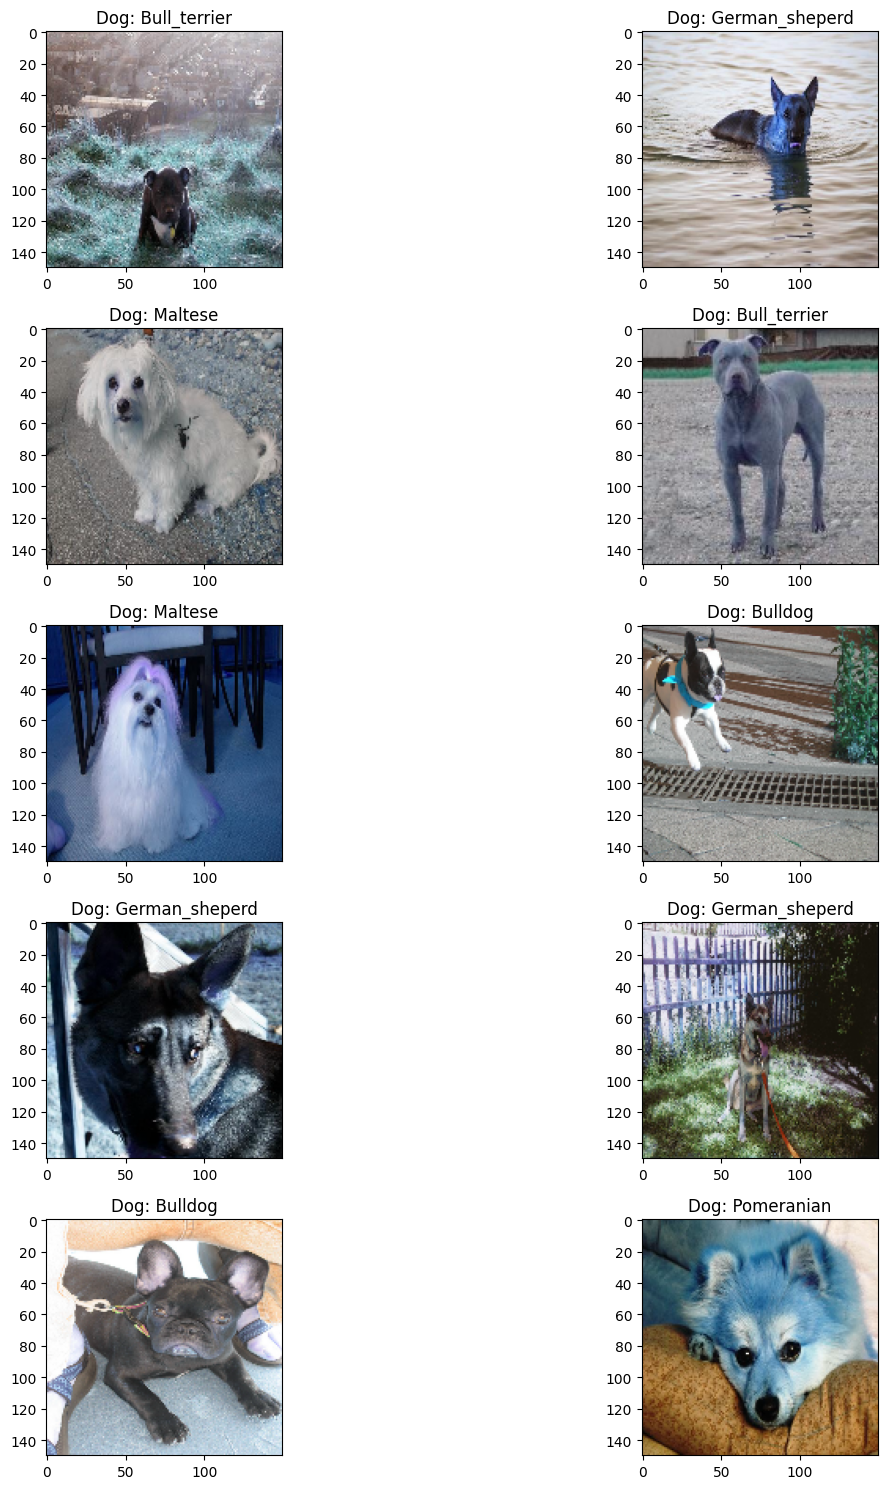

In [18]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])

plt.tight_layout()


In [19]:
base_model = InceptionV3(include_top=False,
                  input_shape = (IMG_SIZE,IMG_SIZE,3),
                  weights = 'imagenet')

# Freezing layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 23118119 (88.19 MB)
Trainable params: 1315335 (5.02 MB)
Non-trainable params: 21802784 (83.17 MB)
__________

In [20]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=16),
    validation_data  = (x_test,y_test),

    epochs = 20,
    verbose = 1,
)

Epoch 1/20


<ipython-input-21-a8548b966352>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


54/54 [==============================] - 63s 1s/step - loss: 1.3800 - accuracy: 0.6453 - val_loss: 0.5572 - val_accuracy: 0.8140
Epoch 2/20
54/54 [==============================] - 55s 1s/step - loss: 0.6061 - accuracy: 0.7860 - val_loss: 0.5355 - val_accuracy: 0.8326
Epoch 3/20
54/54 [==============================] - 56s 1s/step - loss: 0.5806 - accuracy: 0.8070 - val_loss: 0.5201 - val_accuracy: 0.8279
Epoch 4/20
54/54 [==============================] - 57s 1s/step - loss: 0.5085 - accuracy: 0.8233 - val_loss: 0.4851 - val_accuracy: 0.8651
Epoch 5/20
54/54 [==============================] - 54s 1s/step - loss: 0.4473 - accuracy: 0.8419 - val_loss: 0.5643 - val_accuracy: 0.8233
Epoch 6/20
54/54 [==============================] - 54s 989ms/step - loss: 0.4006 - accuracy: 0.8547 - val_loss: 0.5978 - val_accuracy: 0.8140
Epoch 7/20
54/54 [==============================] - 54s 1s/step - loss: 0.3879 - accuracy: 0.8651 - val_loss: 0.6430 - val_accuracy: 0.8000
Epoch 8/20
54/54 [==========

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Visualisation of graph between train accuracy and validation accuracy
plt.figure(figsize=(12,12))
epochs = list(range(1,21))
plt.plot(epochs,train_acc,label='train_acc',)
plt.plot(epochs,val_acc,label='val_acc')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("accuracy pecentage",fontsize=20)
plt.title('Accuracy graph',fontsize=30)
plt.legend()


In [ ]:
plt.figure(figsize=(8,8))
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("loss percentage",fontsize=20)
plt.title('loss graph',fontsize=30)
plt.legend()


In [ ]:
img_url='/content/drive/MyDrive/dogs/dog_images/poodle.jpeg'
new_image = image.load_img(img_url)
print(type(new_image))

new_image = tf.keras.preprocessing.image.img_to_array(new_image)
print("shape of image :",new_image.shape)
print("Type of image :",type(new_image))

# resizing
new_image = tf.image.resize(new_image,(150,150))

## Scaling
new_image = new_image/255
print('After resizing the image shape :',new_image.shape)
new_image = np.expand_dims(new_image,axis=0)
print("image shape",new_image.shape)


In [ ]:
model.predict(new_image)

In [ ]:
array_num = model.predict(new_image)
num_list = array_num.tolist()
x=num_list[0]
item = max(x)
#search for the item
index = x.index(item)
breed_classes=list(zip(breed,breed_name))
q=0
while q<7:
  if index in breed_classes[q]:
    print('Dog Breed: '+ breed_classes[q][1])
    break
  else:
    q=q+1
img = mpimg.imread(img_url)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
def predict(img_url):
  new_image = image.load_img(img_url)
  print(type(new_image))

  new_image = tf.keras.preprocessing.image.img_to_array(new_image)
  print("shape of image :",new_image.shape)
  print("Type of image :",type(new_image))

  # resizing
  new_image = tf.image.resize(new_image,(150,150))

  ## Scaling
  new_image = new_image/255
  print('After resizing the image shape :',new_image.shape)
  new_image = np.expand_dims(new_image,axis=0)
  print("image shape",new_image.shape)
  array_num = model.predict(new_image)
  num_list = array_num.tolist()
  x=num_list[0]
  item = max(x)
  #search for the item
  index = x.index(item)
  breed_classes=list(zip(breed,breed_name))
  q=0
  while q<7:
    if index in breed_classes[q]:
      print('Dog Breed: '+ breed_classes[q][1])
      break
    else:
      q=q+1
  img = mpimg.imread(img_url)
  imgplot = plt.imshow(img)
  plt.show()


<class 'PIL.JpegImagePlugin.JpegImageFile'>
shape of image : (553, 554, 3)
Type of image : <class 'numpy.ndarray'>
After resizing the image shape : (150, 150, 3)
image shape (1, 150, 150, 3)
1/1 [==============================] - 0s 158ms/step
Dog Breed: Bulldog


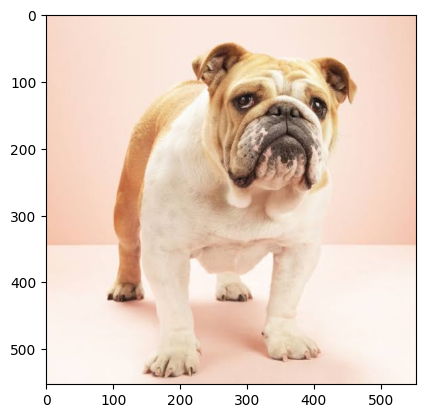

<class 'PIL.JpegImagePlugin.JpegImageFile'>
shape of image : (3264, 4928, 3)
Type of image : <class 'numpy.ndarray'>
After resizing the image shape : (150, 150, 3)
image shape (1, 150, 150, 3)
1/1 [==============================] - 0s 213ms/step
Dog Breed: Poodle


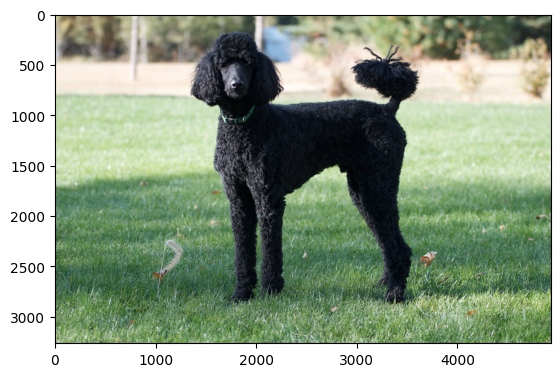

<class 'PIL.WebPImagePlugin.WebPImageFile'>
shape of image : (400, 600, 3)
Type of image : <class 'numpy.ndarray'>
After resizing the image shape : (150, 150, 3)
image shape (1, 150, 150, 3)
1/1 [==============================] - 0s 122ms/step
Dog Breed: Maltese


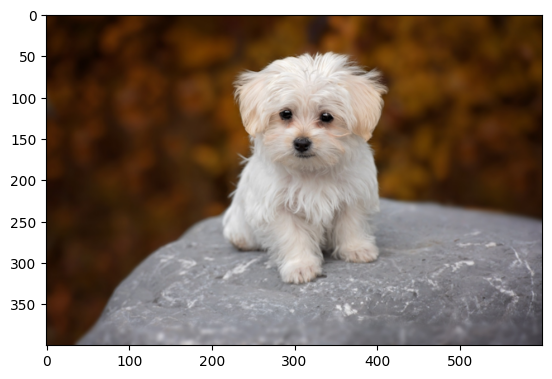

In [29]:
predict('/content/drive/MyDrive/dogs/dog_images/bulldog.jpg')
predict('/content/drive/MyDrive/dogs/dog_images/poodle.jpeg')
predict('/content/drive/MyDrive/dogs/dog_images/maltese.jpeg')